In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('tip.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
df[['total_bill', 'tip', 'size']].describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
print(df['size'].unique())


[2 3 4 1 6 5]


In [22]:
#min = 3, max = 51, 

t = (51-3)/10
t


t = (51-3)/20
t

2.4

Стандартное отклонение (std) — показывает, насколько данные “гуляют” вокруг среднего:

Для счёта σ≈9, значит большинство заказов между 20±9 → примерно от 11 до 29₽

Для чаевых σ≈1.38 → большинство чаевых между 3±1.38 → от ~1.6 до 4.4₽

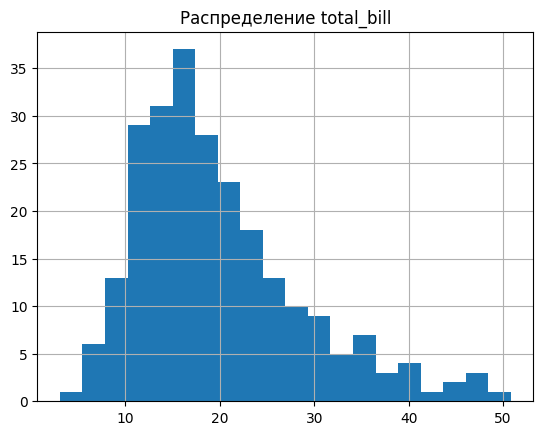

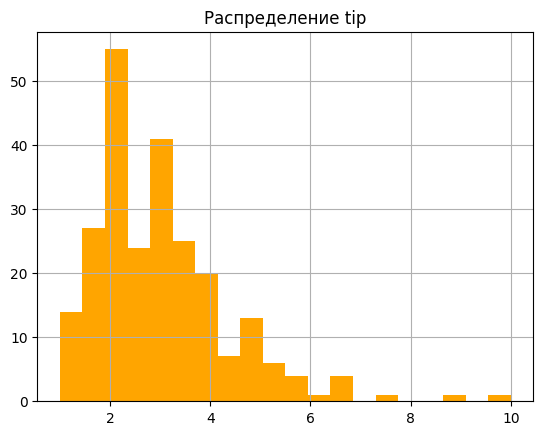

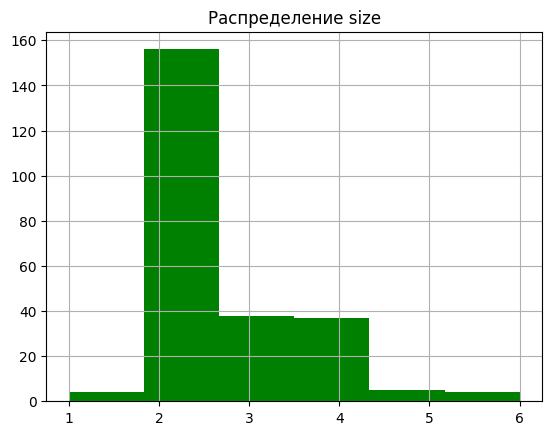

In [41]:
df['total_bill'].hist(bins=20)
plt.title("Распределение total_bill")
plt.show()

df['tip'].hist(bins=20, color='orange')
plt.title("Распределение tip")
plt.show()

df['size'].hist(bins=6, color='green')
plt.title("Распределение size")
plt.show()


In [ ]:
# Y показывает сколько раз встречается значение из X. Высокий столбик = много заказов с таким счётом, низкий столбик = редкие заказы.

Сравниваем размер чаевых между мужчинами и женщинами
sex → tip (мужчины vs женщины)

есть ли привычка у курящих заказывать больше еды или напитков?
smoker → total_bill

есть ли дни, когда люди тратят больше или дают больше чаевых?
day → total_bill или tip


value_count - КАЖДАЯ УНИКАЛЬНАЯ категория в столбце.

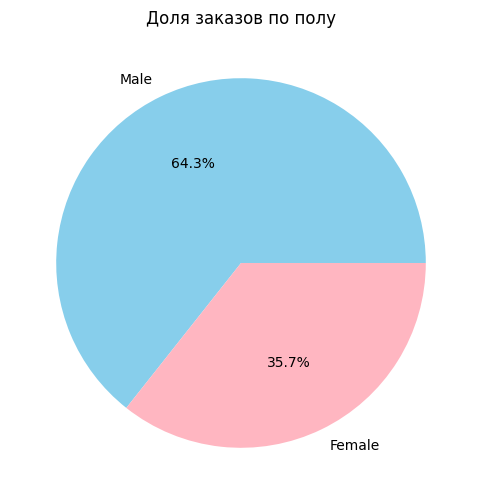

In [ ]:

sex_counts = df['sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue','lightpink'])
plt.title("Доля заказов по полу")
plt.show()


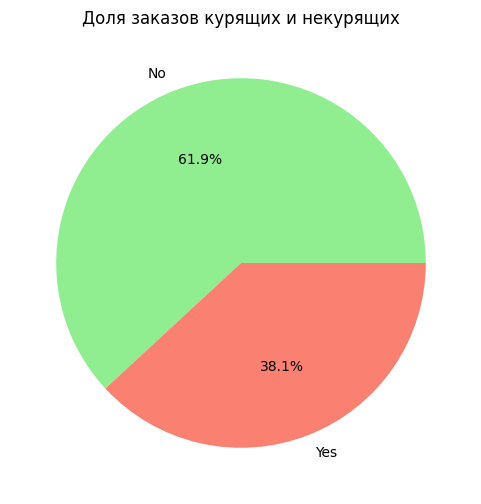

In [ ]:

smoker_counts = df['smoker'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['lightgreen','salmon'])
plt.title("Доля заказов курящих и некурящих")
plt.show()


большинство заказов делает группа некурящие. Но если посмотреть на суммы заказов (boxplot), видно, что в среднем курящие и некурящие тратят примерно одинаково, просто у курящих больше вариации, а у некурящих есть редкие очень большие заказы.

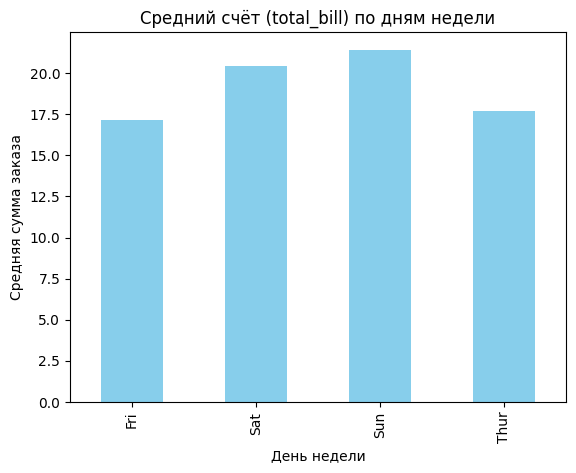

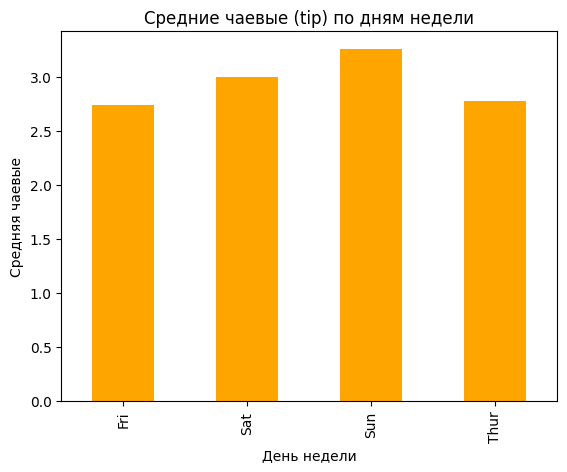

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


mean_total_bill = df.groupby('day')['total_bill'].mean()

mean_total_bill.plot(kind='bar', color='skyblue')
plt.title("Средний счёт (total_bill) по дням недели")
plt.xlabel("День недели")
plt.ylabel("Средняя сумма заказа")
plt.show()


mean_tip = df.groupby('day')['tip'].mean()
mean_tip.plot(kind='bar', color='orange')
plt.title("Средние чаевые (tip) по дням недели")
plt.xlabel("День недели")
plt.ylabel("Средняя чаевые")
plt.show()


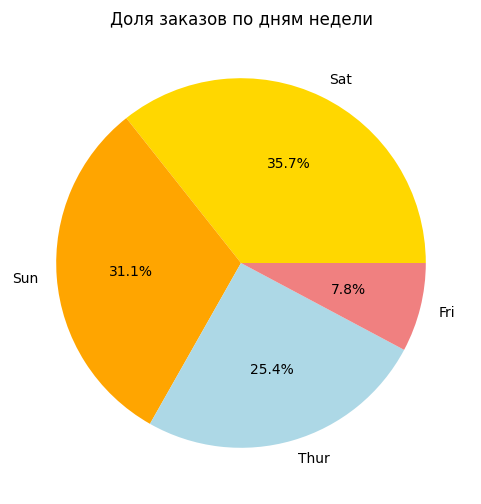

In [30]:
day_counts = df['day'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', colors=['gold','orange','lightblue','lightcoral'])
plt.title("Доля заказов по дням недели")
plt.show()

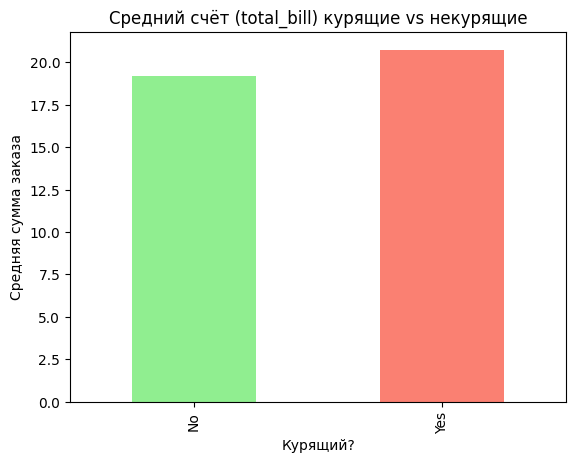

In [31]:
mean_total_bill_smoker = df.groupby('smoker')['total_bill'].mean()
mean_total_bill_smoker.plot(kind='bar', color=['lightgreen','salmon'])
plt.title("Средний счёт (total_bill) курящие vs некурящие")
plt.xlabel("Курящий?")
plt.ylabel("Средняя сумма заказа")
plt.show()

In [33]:

categorical_cols = ['sex', 'smoker', 'day', 'time']


df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)


df_encoded.head()


,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,True,False,True,False,False,False,True,False,True,False
1,10.34,1.66,3,False,True,True,False,False,False,True,False,True,False
2,21.01,3.50,3,False,True,True,False,False,False,True,False,True,False
3,23.68,3.31,2,False,True,True,False,False,False,True,False,True,False
4,24.59,3.61,4,True,False,True,False,False,False,True,False,True,False


In [35]:
corr_matrix_all = df_encoded.corr()

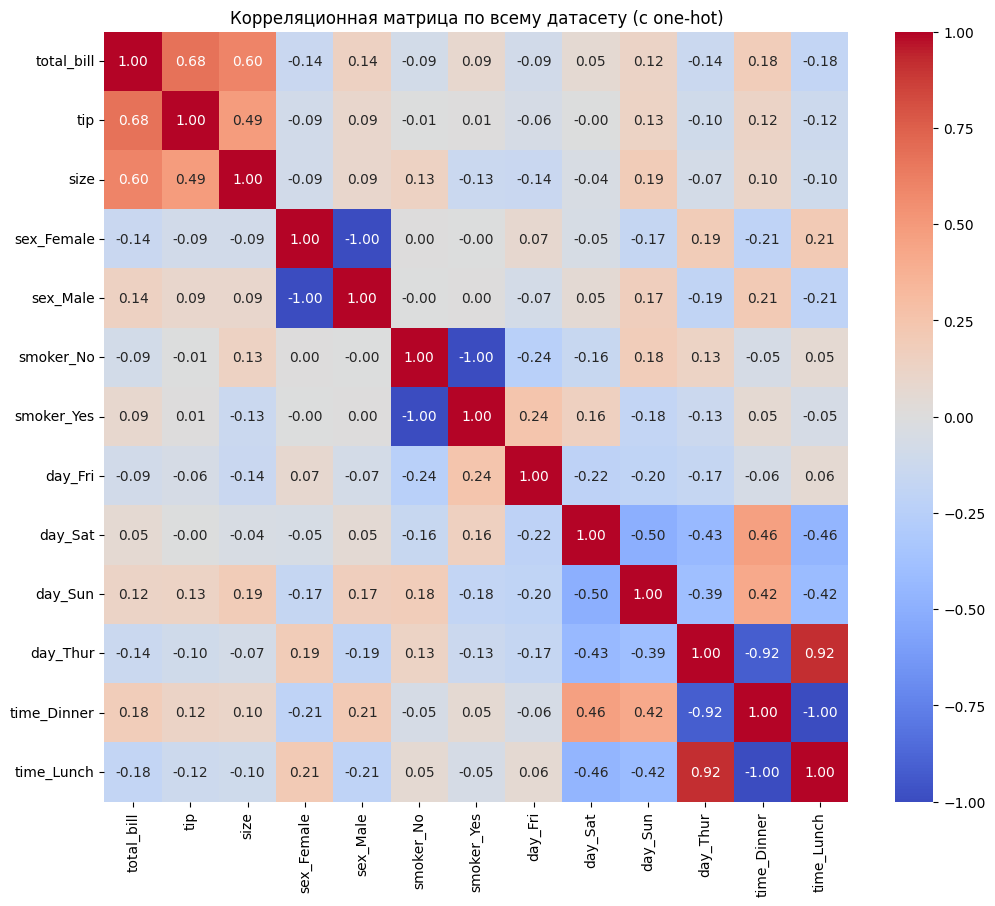

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_all, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица по всему датасету (с one-hot)")
plt.show()

In [37]:

df_sex = pd.get_dummies(df['sex'], drop_first=False)
df_numeric = pd.concat([df[['total_bill', 'tip', 'size']], df_sex], axis=1)

df_numeric.head()


,total_bill,tip,size,Female,Male
0,16.99,1.01,2,True,False
1,10.34,1.66,3,False,True
2,21.01,3.50,3,False,True
3,23.68,3.31,2,False,True
4,24.59,3.61,4,True,False


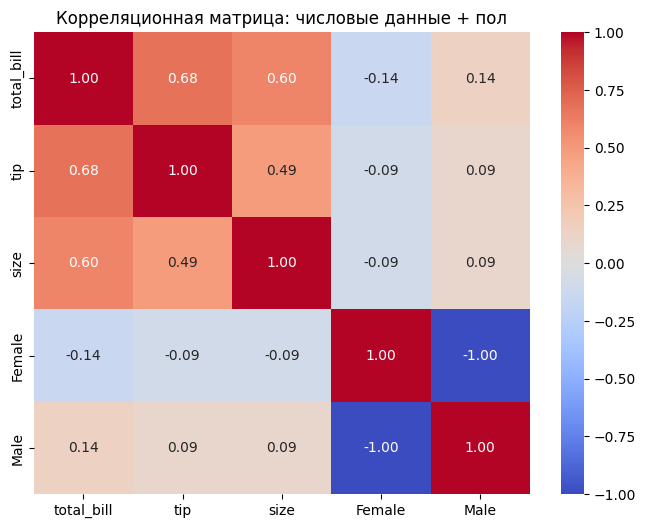

In [ ]:
corr_numeric_sex = df_numeric.corr()


plt.figure(figsize=(8,6))
sns.heatmap(corr_numeric_sex, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица: числовые данные + пол")
plt.show()